In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from scikitplot import decomposition
from scipy.stats import norm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [27]:
data = pd.read_table("data/Aggregation.txt", header=None)
X_norm = preprocessing.scale(df.iloc[:,0:2])
X = preprocessing.scale(data.iloc[:,0:2])
X = data.iloc[:,0:2]
y = data[2]

In [4]:
data[2].value_counts()

4    273
2    170
6    130
3    102
1     45
7     34
5     34
Name: 2, dtype: int64

Text(0.5,1,'Fit results: (mu = -0.00,  std = 1.00)')

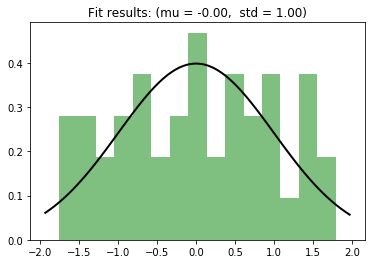

In [193]:
d = preprocessing.scale(df[0][df[2] == 1])
plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
xmin, xmax = plt.xlim()
mu, std = norm.fit(d)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: (mu = %.2f,  std = %.2f)" % (mu, std)
plt.title(title)

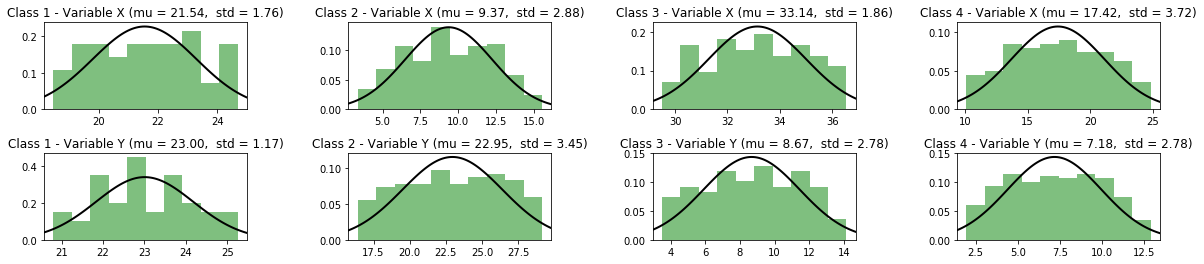

In [14]:
fig, ax = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.set_size_inches(20, 4)

for i in range(0,4):
#     d = preprocessing.scale(data[0][data[2] == i+1])
    d = np.array(data[0][data[2] == i+1])
    ax[0,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[0,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[0,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable X (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[0,i].set_title(title)
    
#     d = preprocessing.scale(data[1][data[2] == i+1])
    d = np.array(data[1][data[2] == i+1])
    ax[1,i].hist(d, density=True, alpha=0.5, color='g')
    # plt.hist(d, bins=15, density=True, alpha=0.5, color='g')
    xmin, xmax = ax[1,i].set_xlim()
    mu, std = norm.fit(d)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax[1,i].plot(x, p, 'k', linewidth=2)
    title = "Class %d - Variable Y (mu = %.2f,  std = %.2f)" % (i+1, mu, std)
    ax[1,i].set_title(title)

plt.show()

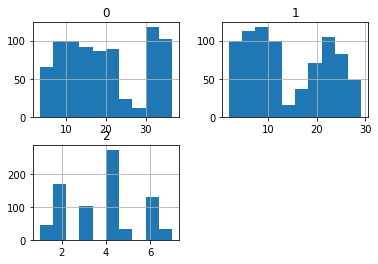

In [14]:
df.hist()
plt.show()

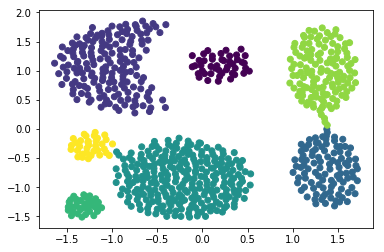

In [240]:
plt.scatter(x = X_norm[:,0], y = X_norm[:,1], c=df[2])
plt.show()

In [ ]:
color = ["wub"]

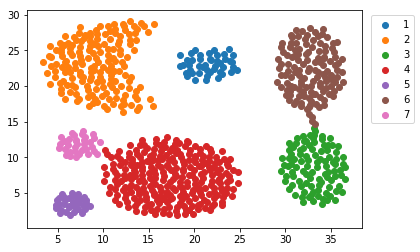

In [272]:
fig, ax = plt.subplots(1, 1)
for x in range(1,8):
    ax.scatter(x = df[0][df[2] == x], y = df[1][df[2] == x], label=str(x))
ax.legend(loc=1, bbox_to_anchor=(1.17,1))

### Model

In [24]:
h = .2 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

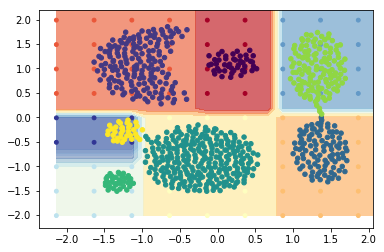

In [25]:
clf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=2)
clf.fit(X, y)
cmap = plt.cm.RdYlBu
plot_step_coarser = 0.5
estimator_alpha = 1.0 / len(clf.estimators_)
for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = clf.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                        c=Z_points_coarser, cmap=cmap)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


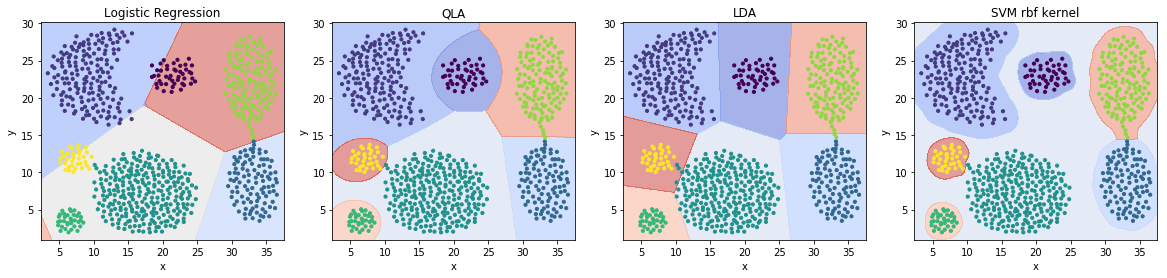

In [32]:
X = data.iloc[:,0:2]
models = (LogisticRegression(),
          QuadraticDiscriminantAnalysis(),
          LinearDiscriminantAnalysis(),
          GaussianNB(),
          
          svm.SVC(kernel='rbf', gamma=0.7))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Logistic Regression',
          'QLA',
          'LDA',
          'SVM rbf kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 4)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.set_size_inches(20, 4)

X0, X1 = X[0], X[1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(X0, X1, c=y, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')
#     ax.set_xticks(())
#     ax.set_yticks(())
    ax.set_title(title)

plt.show()

C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


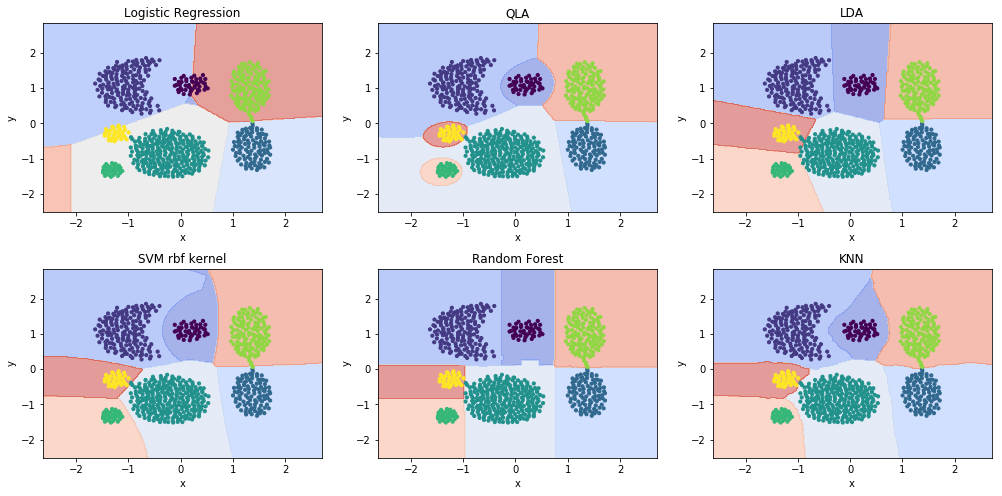

In [77]:
X = preprocessing.scale(data.iloc[:,0:2])
models = (LogisticRegression(),
          QuadraticDiscriminantAnalysis(),
          LinearDiscriminantAnalysis(),
          svm.SVC(kernel='rbf'),
          RandomForestClassifier(max_depth=10),
         KNeighborsClassifier(n_neighbors=3))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('Logistic Regression',
          'QLA',
          'LDA',
          'SVM rbf kernel',
          'Random Forest',
          'KNN')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_size_inches(17,8)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.5)
    ax.scatter(X0, X1, c=y, s=10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.set_title(title)

plt.show()

In [79]:
X = preprocessing.scale(data.iloc[:,0:2])
models = (LogisticRegression(),
          QuadraticDiscriminantAnalysis(),
          LinearDiscriminantAnalysis(),
          svm.SVC(kernel='rbf'),
          RandomForestClassifier(max_depth=10),
         KNeighborsClassifier(n_neighbors=3))

for m in models:
    scores  = cross_val_score(m, X, y, cv=60)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    scores
    print(" ------------- ")

C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 34 members, which is too few. The minimum number of members in any class cannot be less than n_splits=60.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.87 (+/- 0.17)
 ------------- 
Accuracy: 1.00 (+/- 0.02)
 ------------- 


C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 34 members, which is too few. The minimum number of members in any class cannot be less than n_splits=60.
  % (min_groups, self.n_splits)), Warning)
C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 34 members, which is too few. The minimum number of members in any class cannot be less than n_splits=60.
  % (min_groups, self.n_splits)), Warning)
C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  

Accuracy: 0.99 (+/- 0.08)
 ------------- 
Accuracy: 1.00 (+/- 0.03)
 ------------- 


C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 34 members, which is too few. The minimum number of members in any class cannot be less than n_splits=60.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 1.00 (+/- 0.03)
 ------------- 
Accuracy: 0.99 (+/- 0.07)
 ------------- 


C:\Users\tanni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 34 members, which is too few. The minimum number of members in any class cannot be less than n_splits=60.
  % (min_groups, self.n_splits)), Warning)


In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
